# TD6 : Kernel methods

## 1. Faces classification

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person = 60)

In [11]:
faces

{'data': array([[0.53464055, 0.5254902 , 0.49673203, ..., 0.00653595, 0.00653595,
         0.00261438],
        [0.28627452, 0.20784314, 0.2522876 , ..., 0.96993464, 0.9490196 ,
         0.9346406 ],
        [0.31895426, 0.39215687, 0.275817  , ..., 0.4261438 , 0.7908497 ,
         0.9555555 ],
        ...,
        [0.11633987, 0.11111111, 0.10196079, ..., 0.5686274 , 0.5803922 ,
         0.5542484 ],
        [0.19346406, 0.21176471, 0.2901961 , ..., 0.6862745 , 0.654902  ,
         0.5908497 ],
        [0.12287582, 0.09803922, 0.10980392, ..., 0.12941177, 0.1633987 ,
         0.29150328]], dtype=float32),
 'images': array([[[0.53464055, 0.5254902 , 0.49673203, ..., 0.2653595 ,
          0.2653595 , 0.26013073],
         [0.56993467, 0.545098  , 0.4797386 , ..., 0.26143792,
          0.2627451 , 0.26013073],
         [0.5882353 , 0.5398693 , 0.47712418, ..., 0.2653595 ,
          0.26013073, 0.25751635],
         ...,
         [0.59869283, 0.7176471 , 0.4013072 , ..., 0.00522876,
     

In [6]:
faces.data.shape

(1348, 2914)

In [7]:
faces.images.shape

(1348, 62, 47)

In [9]:
faces.target_names.shape

(8,)

In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((1078, 2914), (270, 2914))

In [48]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [49]:
explained_variance = sum(pca.explained_variance_ratio_)
explained_variance

0.9085074352333322

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [51]:
svc = SVC()
svc.fit(X_train_pca, y_train)

SVC()

0.7444444444444445
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        12
           1       0.88      0.82      0.85        51
           2       0.83      0.60      0.70        25
           3       0.68      0.96      0.79        98
           4       0.60      0.43      0.50        21
           5       1.00      0.40      0.57        15
           6       1.00      0.90      0.95        10
           7       0.75      0.55      0.64        38

    accuracy                           0.74       270
   macro avg       0.81      0.64      0.69       270
weighted avg       0.76      0.74      0.73       270



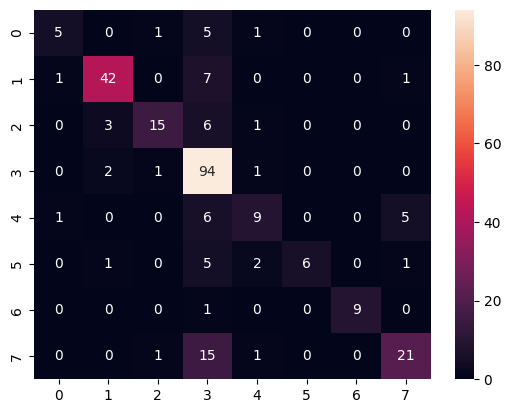

In [52]:
import seaborn as sns
pred = svc.predict(X_test_pca)
confusion = confusion_matrix(y_test, pred)
sns.heatmap(confusion, annot=True)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

In [53]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import numpy as np

pipeline = make_pipeline(PCA(), SVC())
param_grid={'pca__n_components' : np.logspace(2, 4, 3), 'svc__C': np.logspace(-2, 3, 10), 'svc__gamma': np.logspace(-4, 1, 10)}
clf = GridSearchCV(pipeline, param_grid)
clf.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA(n_components=100)),
                                       ('svc', SVC())]),
             param_grid={'svc__C': array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03]),
                         'svc__gamma': array([1.00000000e-04, 3.59381366e-04, 1.29154967e-03, 4.64158883e-03,
       1.66810054e-02, 5.99484250e-02, 2.15443469e-01, 7.74263683e-01,
       2.78255940e+00, 1.00000000e+01])})

In [55]:
import pandas as pd
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.431108,0.127033,0.085790,0.013268,0.01,0.0001,"{'svc__C': 0.01, 'svc__gamma': 0.0001}",0.402778,0.402778,0.398148,0.400000,0.400000,0.400741,0.001795,41
1,0.384510,0.056089,0.054460,0.021548,0.01,0.000359,"{'svc__C': 0.01, 'svc__gamma': 0.0003593813663...",0.402778,0.402778,0.398148,0.400000,0.400000,0.400741,0.001795,41
2,0.352098,0.054116,0.059524,0.013981,0.01,0.001292,"{'svc__C': 0.01, 'svc__gamma': 0.0012915496650...",0.402778,0.402778,0.398148,0.400000,0.400000,0.400741,0.001795,41
3,0.351142,0.088042,0.060287,0.022986,0.01,0.004642,"{'svc__C': 0.01, 'svc__gamma': 0.0046415888336...",0.402778,0.402778,0.398148,0.400000,0.400000,0.400741,0.001795,41
4,0.297352,0.030177,0.043205,0.010725,0.01,0.016681,"{'svc__C': 0.01, 'svc__gamma': 0.0166810053720...",0.402778,0.402778,0.398148,0.400000,0.400000,0.400741,0.001795,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.948907,0.039488,0.128846,0.004956,1000.0,0.059948,"{'svc__C': 1000.0, 'svc__gamma': 0.05994842503...",0.564815,0.606481,0.606481,0.567442,0.534884,0.576021,0.027376,26
96,0.966827,0.031698,0.125980,0.002526,1000.0,0.215443,"{'svc__C': 1000.0, 'svc__gamma': 0.21544346900...",0.402778,0.402778,0.398148,0.400000,0.400000,0.400741,0.001795,41
97,1.023473,0.087171,0.136301,0.011763,1000.0,0.774264,"{'svc__C': 1000.0, 'svc__gamma': 0.77426368268...",0.402778,0.402778,0.398148,0.400000,0.400000,0.400741,0.001795,41
98,0.975493,0.052244,0.138365,0.009751,1000.0,2.782559,"{'svc__C': 1000.0, 'svc__gamma': 2.78255940220...",0.402778,0.402778,0.398148,0.400000,0.400000,0.400741,0.001795,41


In [56]:
clf.best_params_

{'svc__C': 77.42636826811278, 'svc__gamma': 0.00035938136638046257}

## 2. Problem

In [57]:
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [58]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

In [60]:
svc = SVC(C = 10, kernel="poly", degree = 5)
svc.fit(X, y)

SVC(C=10, degree=5, kernel='poly')